In [1]:
from keras import backend as k
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'keras'

In [20]:
#Define the ConvNet
class LetNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        # CONV => RELU => POOL
        # input layer
        model.add(Conv2D(20, kernel_size=5, padding="same", input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

        # hidden layer 1
        model.add(Conv2D(50, kernel_size=5, padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

        # flattening and dense Network - RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model
    

60000 train samples
10000 test samples
Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.1818 - acc: 0.9455 - val_loss: 0.0574 - val_acc: 0.9826
Epoch 2/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0484 - acc: 0.9855 - val_loss: 0.0450 - val_acc: 0.9863
Epoch 3/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0316 - acc: 0.9899 - val_loss: 0.0375 - val_acc: 0.9886
Epoch 4/20
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0237 - acc: 0.9923 - val_loss: 0.0324 - val_acc: 0.9898
Epoch 5/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0170 - acc: 0.9944 - val_loss: 0.0344 - val_acc: 0.9901
Epoch 6/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0141 - acc: 0.9951 - val_loss: 0.0411 - val_acc: 0.9877
Epoch 7/20
48000/48000 [=================

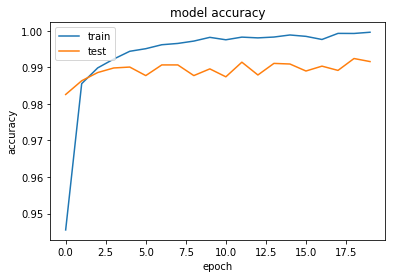

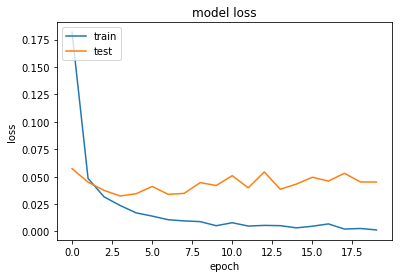

In [22]:
# network and training

NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = 28, 28 # image dimentions
NB_CLASSES = 10 # number of output classes
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

# data shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
k.set_image_dim_ordering("th")

# consider as float and normalize them
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# we need a 60k * [1 * 28 * 28] shape as input to the ConvNet
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# initialize the optimizer and model
model = LetNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("Test score:", score[0])
print("Test accuracy:", score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()